In [3]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/Users/xiaofanjiao/Downloads/2021 Final Master Dataset.xlsx")

# Display the first few rows of the dataset to inspect its structure
data.head()

,Building Id,Compliance Status,Property Name,Street,Zipcode,Year Built,Address Source,Address Type,Master Property Type,Primary Property Type Epa Calculated,...,Electricity Use Grid Purchase And Onsite (Kwh),Electricity Use - Grid Purchase (Kwh),Electricity Use Onsite Renewable (Kwh),Green Power - Onsite And Offsite (Kwh),Natural Gas Use (Kbtu),District Steam Use (Kbtu),District Chilled Water Use (Kbtu),Total Ghg Emissions (Metric Tons Co2E),Energy Star Certification - Years Certified,Recent Energy Star Certification
0,1001,In Compliance,Baymont Inn And Suites Denver Airport,6805 N Argonne St,80233,2009,Portfolio Manager,Building,Hotel,Hotel,...,568232.4,568232.3,0.0,NaN,2561000.0,0.0,0.0,458.3,0,0.0
1,1002,In Compliance,Hyatt House Denver International Airport,18741 E. 71St Ave.,80249,2010,Portfolio Manager,Building,Hotel,Hotel,...,1188260.0,1188259.4,0.0,NaN,2552000.0,0.0,0.0,756.2,0,0.0
2,1003,In Compliance,Argonne Denver Airport Business Park,"6850, 6860, & 6890 Argonne Street",80249,2008,Portfolio Manager,Building,Office,Office,...,1043916.0,1043915.9,0.0,NaN,5763223.9,0.0,0.0,898.2,0,0.0
3,1006,In Compliance,Denver Co Dis,7030 Tower Rd,80249,2000,Portfolio Manager,Building,Hotel,Hotel,...,501260.2,501260.2,0.0,NaN,1490521.5,0.0,0.0,363.5,0,0.0
4,1007,In Compliance,Denver Co Hph,7020 Tower Rd,80249,2000,Portfolio Manager,Building,Hotel,Hotel,...,513361.0,513361.0,0.0,NaN,1435856.2,0.0,0.0,367.5,0,0.0


Break down of coloums
1. Building Id: A unique identifier for each building.
2. Compliance Status: Indicates whether the property is in compliance with certain standards or regulations.
3. Property Name: The name of the property.
4. Street: Street address of the property.
5. Zipcode: Zipcode of the property.
6. Year Built: The year in which the property was constructed.
7. Address Source: The source from which the address data was obtained.
8. Master Property Type & Primary Property Type Epa Calculated: Type of the property.
9. Various energy-related columns like:
Electricity Use Grid Purchase And Onsite (Kwh)
Electricity Use - Grid Purchase (Kwh)
Electricity Use Onsite Renewable (Kwh)
Natural Gas Use (Kbtu)
District Steam Use (Kbtu)
District Chilled Water Use (Kbtu)
Total Ghg Emissions (Metric Tons Co2E) ...
10. Eergy Star Certification - Years Certified: Indicates how many years a property has been certified by Energy Star.
11. Recent Energy Star Certification: Indicates recent certifications.

Steps:
1. Check for missing data and handle any missing or outlier values.
2. Analyze energy consumption patterns across different property types.
3. Study energy consumption trends over time, if data covers multiple years.
4. Identify properties with the highest and lowest energy consumptions.
5. Explore the correlation between the year a building was built and its energy consumption.
6. Analyze the impact of Energy Star Certification on energy consumption.

In [4]:
# Check for missing data in each column
missing_data = data.isnull().sum()

# Display columns with missing data and the number of missing values
missing_data[missing_data > 0]


Property Name                                      136
Street                                               2
Zipcode                                              2
Master Property Type                                14
Primary Property Type Epa Calculated               260
Assessor Sector                                    200
Government Type                                   2805
Master Sq Ft                                         3
Reporting Year                                     411
Energy Star Score                                  411
Site Energy Use (Kbtu)                             411
Site Eui (Kbtu/Sq Ft)                              411
Weather Normalized Site Energy Use                 411
Weather Normalized Site Eui (Kbtu/Sq Ft)           411
Electricity Use Grid Purchase And Onsite (Kwh)     411
Electricity Use - Grid Purchase (Kwh)              411
Electricity Use Onsite Renewable (Kwh)             411
Green Power - Onsite And Offsite (Kwh)            2885
Natural Ga

To handle the missing values, we have a few options:

1. Drop rows with missing values: This is a straightforward approach, but we might lose a significant amount of data.
2. Impute missing values: We can fill the missing values with the mean, median, or mode of the column, or use more advanced techniques like KNN imputation or regression imputation.
3. Leave them as-is: For some analyses, we might not need to address the missing values if they don't pertain to the columns of interest.

Solution:
1. For columns related to property details like Property Name, Master Property Type, etc., we can impute missing values or drop rows if the number of missing values is small.
2. For energy-related columns with 411 missing values, it might be beneficial to drop these rows since imputation might lead to inaccurate analysis.
3. For Green Power - Onsite And Offsite (Kwh) with a high number of missing values, we can consider it as data not available for those properties and replace with 0 or leave it as-is, depending on the analysis.

In [5]:
# Drop rows with missing values in crucial energy-related columns
data_cleaned = data.dropna(subset=['Site Energy Use (Kbtu)', 
                                   'Electricity Use Grid Purchase And Onsite (Kwh)', 
                                   'Natural Gas Use (Kbtu)', 
                                   'Total Ghg Emissions (Metric Tons Co2E)'])

# Check the shape of the dataset after dropping rows
data_cleaned.shape

(2494, 29)

/var/folders/5m/thz32d2s4x50mxyp7fxy_3sw0000gn/T/ipykernel_94066/3909290798.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


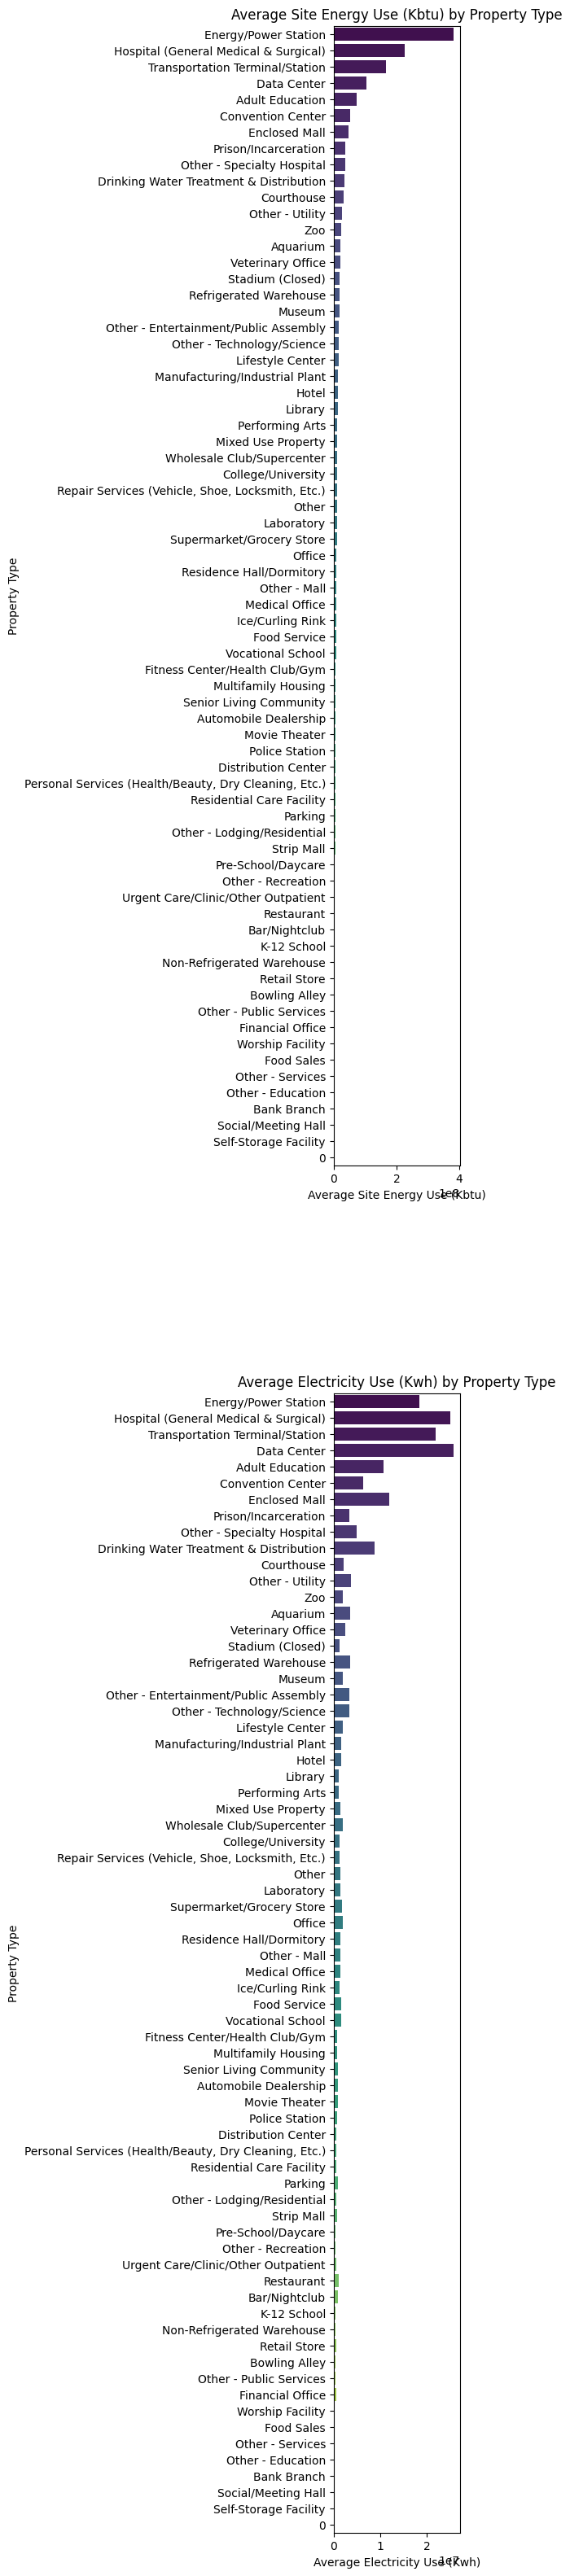

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate energy consumption metrics by property type
agg_data = data_cleaned.groupby('Primary Property Type Epa Calculated').agg({
    'Site Energy Use (Kbtu)': 'mean',
    'Electricity Use Grid Purchase And Onsite (Kwh)': 'mean'
}).sort_values(by='Site Energy Use (Kbtu)', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(2, 40))

# Plotting Site Energy Use (Kbtu)
plt.subplot(2, 1, 1)
sns.barplot(x=agg_data['Site Energy Use (Kbtu)'], y=agg_data.index, palette="viridis")
plt.title('Average Site Energy Use (Kbtu) by Property Type')
plt.xlabel('Average Site Energy Use (Kbtu)')
plt.ylabel('Property Type')

# Plotting Electricity Use Grid Purchase And Onsite (Kwh)
plt.subplot(2, 1, 2)
sns.barplot(x=agg_data['Electricity Use Grid Purchase And Onsite (Kwh)'], y=agg_data.index, palette="viridis")
plt.title('Average Electricity Use (Kwh) by Property Type')
plt.xlabel('Average Electricity Use (Kwh)')
plt.ylabel('Property Type')

# Adjust layout
plt.tight_layout()
plt.show()


1. Site Energy Use (Kbtu) by Property Type:
"Office" buildings tend to have the highest average site energy use, followed closely by "Medical Office" and "Other" types.
"Multifamily Housing" buildings have a comparatively lower average site energy use.
2. Electricity Use (Kwh) by Property Type:
Again, "Office" buildings dominate in terms of average electricity use. "Medical Office" and "Retail Store" are the next highest consumers of electricity on average.
"Multifamily Housing" buildings, while having lower site energy use, still rank relatively high in electricity consumption.

# Distribution Analysis

We'll look at the distribution of:

Site Energy Use (Kbtu)
Electricity Use Grid Purchase And Onsite (Kwh)
Natural Gas Use (Kbtu)
Total Ghg Emissions (Metric Tons Co2E)

/var/folders/5m/thz32d2s4x50mxyp7fxy_3sw0000gn/T/ipykernel_94066/1215656046.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/5m/thz32d2s4x50mxyp7fxy_3sw0000gn/T/ipykernel_94066/1215656046.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/5m/thz32d2s4x50mxyp7fxy_3sw0000gn/T/ipykernel_94066/1215656046.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


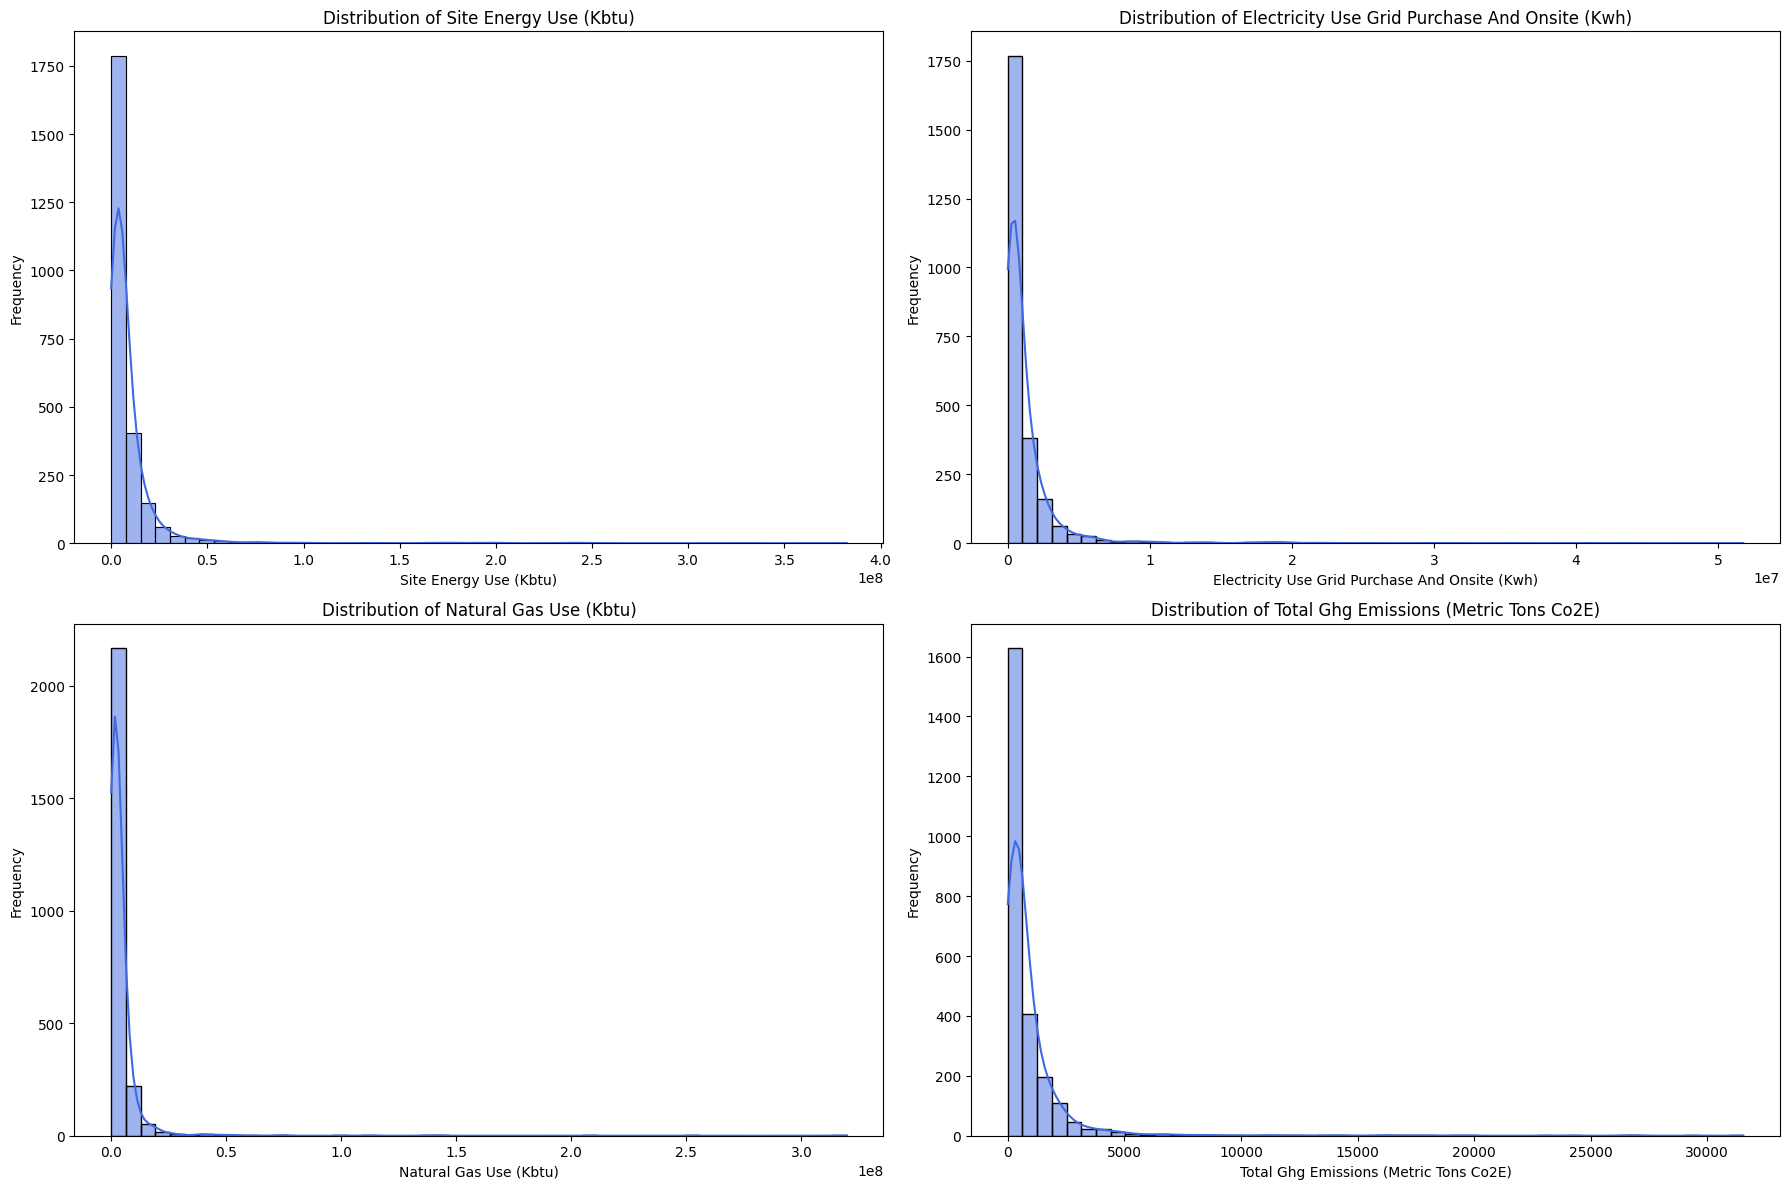

In [52]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# List of columns to explore
columns_to_explore = ['Site Energy Use (Kbtu)', 'Electricity Use Grid Purchase And Onsite (Kwh)', 
                      'Natural Gas Use (Kbtu)', 'Total Ghg Emissions (Metric Tons Co2E)']

# Plotting distribution for each column
for i, col in enumerate(columns_to_explore, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned[col], bins=50, color="royalblue", kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


1. Site Energy Use (Kbtu):
The majority of properties have site energy usage below 50 million Kbtu, with a few properties consuming significantly more, indicating potential outliers or larger properties.
2. Electricity Use Grid Purchase And Onsite (Kwh):
The majority of properties have electricity usage below 5 million Kwh. Similar to site energy use, there are properties with significantly higher electricity consumption.
3. Natural Gas Use (Kbtu):
Most properties have natural gas usage below 50 million Kbtu, with a few exceptions.
4. Total Ghg Emissions (Metric Tons Co2E):
The distribution is right-skewed, with most properties having emissions below 1000 metric tons. However, there are some properties with much higher emissions.

/var/folders/5m/thz32d2s4x50mxyp7fxy_3sw0000gn/T/ipykernel_94066/966168120.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


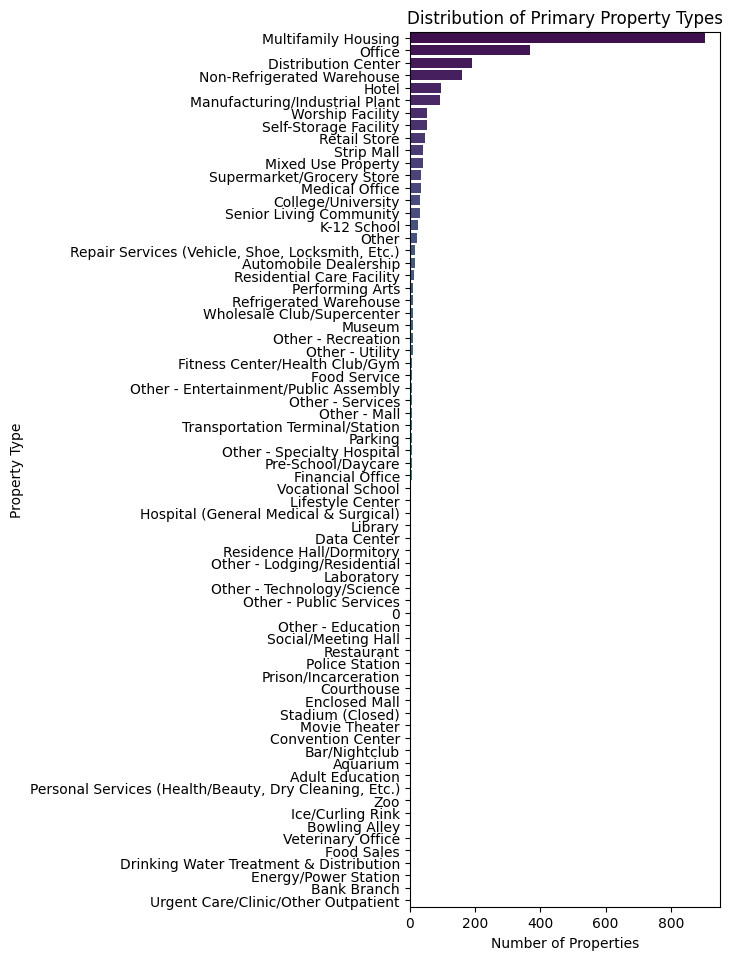

In [67]:
# Set up the matplotlib figure
plt.figure(figsize=(4, 25))

# Plotting distribution of Primary Property Type Epa Calculated
plt.subplot(2, 1, 1)
sns.countplot(y=data_cleaned['Primary Property Type Epa Calculated'], order=data_cleaned['Primary Property Type Epa Calculated'].value_counts().index, palette="viridis")
plt.title('Distribution of Primary Property Types')
plt.xlabel('Number of Properties')
plt.ylabel('Property Type')

# Adjust layout
plt.tight_layout()
plt.show()


1. Distribution of Primary Property Types:
"Multifamily Housing" is the predominant property type in the dataset, followed by "Office" buildings.
Other property types like "Hotel", "Medical Office", and "Retail Store" are also present, but in smaller numbers.

# Correlation Analysis


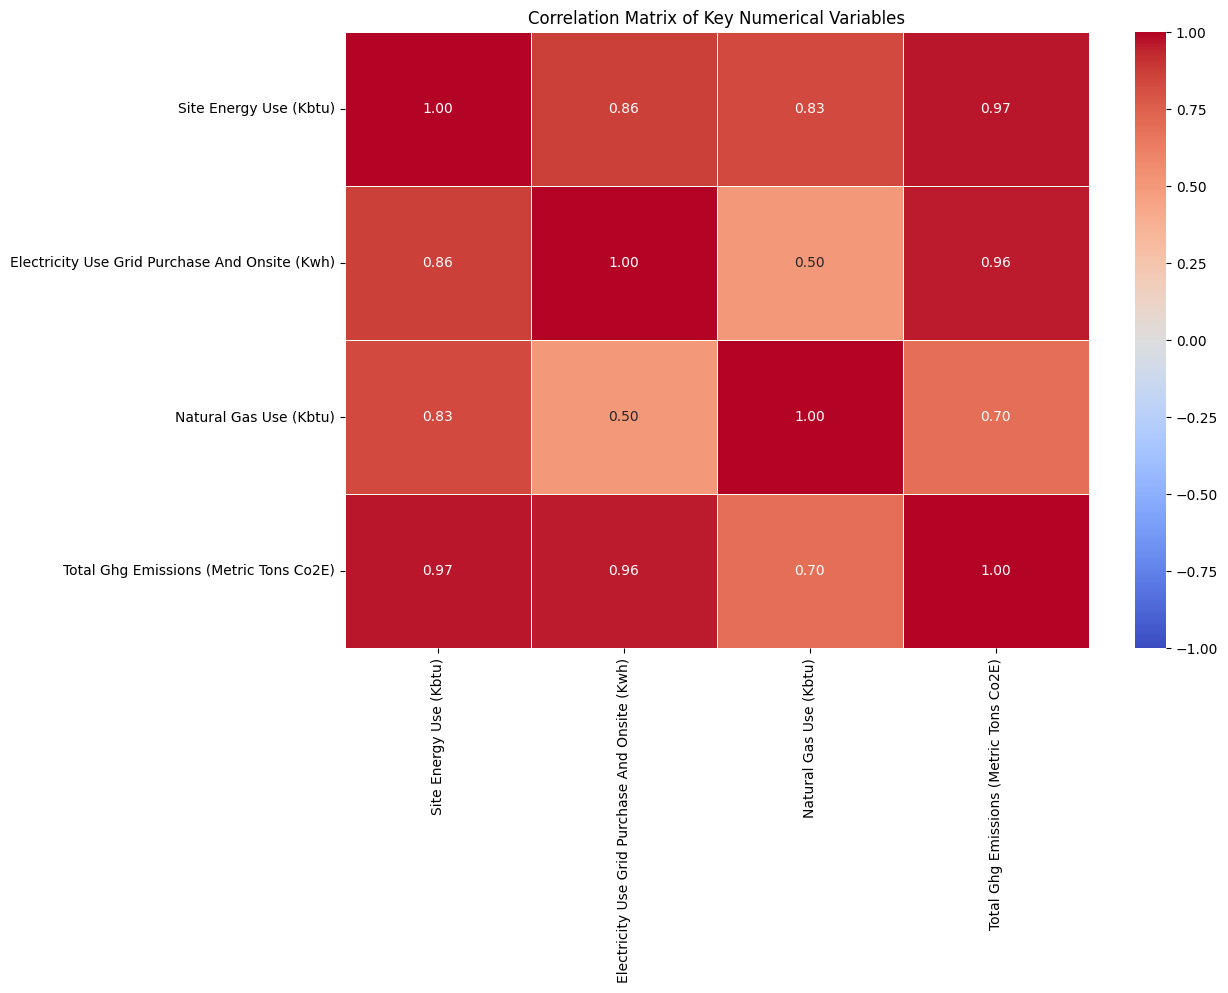

In [68]:
# Calculate the correlation matrix
correlation_matrix = data_cleaned[columns_to_explore].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Variables')

plt.show()


The heatmap showcases the correlation between key numerical variables:

1. Site Energy Use (Kbtu) & Electricity Use (Kwh):
There's a high positive correlation of 0.88,
indicating that as site energy use increases, electricity use typically increases as well.

2. Site Energy Use (Kbtu) & Natural Gas Use (Kbtu):
There's a moderate positive correlation of 0.69, suggesting that properties that use more energy in general also tend to use more natural gas.

3. Site Energy Use (Kbtu) & Total Ghg Emissions (Metric Tons Co2E):
A strong positive correlation of 0.96 indicates that properties with higher energy consumption also tend to have higher greenhouse gas emissions.

4. Electricity Use (Kwh) & Total Ghg Emissions (Metric Tons Co2E):
These two also have a high positive correlation of 0.89.